In [36]:
%load_ext autoreload
%autoreload 2
import sys

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml, load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics

# installable with: `pip install imodels`
from imodels import SLIMRegressor, BayesianRuleListClassifier, RuleFitRegressor, GreedyRuleListClassifier
from imodels import OneRClassifier


# load (regression) data on boston housing prices
def get_reg_boston_data():
    X_reg, y_reg = load_boston(return_X_y=True)
    feature_names = load_boston()['feature_names']
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.75) # split
    return X_train_reg, X_test_reg, y_train_reg, y_test_reg, feature_names

X_train_reg, X_test_reg, y_train_reg, y_test_reg, feat_names_reg = get_reg_boston_data()

print('reg data', X_train_reg.shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
reg data (126, 13)


# rule sets
Rule sets are models that create a set of (potentially overlapping) rules.

### rulefit

In [31]:
# fit a rulefit model
rulefit = RuleFitRegressor()
rulefit.fit(X_train_reg, y_train_reg, feature_names=feat_names_reg)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8725845904662357, tolerance: 0.8512319523809524
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2841217157744573, tolerance: 0.8512319523809524
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0736527982844528, tolerance: 0.6498223214285714
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4783

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.980874774399561, tolerance: 0.8512319523809524
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.126857264653136, tolerance: 1.1318680396825391
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9161149670162203, tolerance: 0.7618240357142857
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.674071

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.3448510612386455, tolerance: 0.8512319523809524
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.336224989788404, tolerance: 1.1318680396825391
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.25466988600608, tolerance: 0.7618240357142857
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.7574787

test mse: 15.96


now, let's inspect the rules

In [38]:
preds = rulefit.predict(X_test_reg)
print(f'test r2: {metrics.r2_score(y_test_reg, preds):0.2f}')

rules = rulefit.get_rules()

rules = rules[rules.coef != 0].sort_values("support", ascending=False)

# 'rule' is how the feature is constructed
# 'coef' is its weight in the final linear model
# 'support' is the fraction of points it applies to
rules[['rule', 'coef', 'support']].head().style.background_gradient(cmap='viridis')

test r2: 0.86


,rule,coef,support
79,DIS > 1.2453500032424927 and LSTAT > 3.424999952316284,-0.831695,0.944444
89,DIS > 1.3149500489234924 and LSTAT > 4.59499979019165,-2.935661,0.896825
66,DIS > 1.2453500032424927 and RM <= 7.140500068664551,-0.023463,0.857143
55,DIS > 1.2928000092506409 and RM <= 7.138499975204468,-0.425669,0.857143
75,DIS > 1.3149500489234924 and RM <= 7.138499975204468,-0.323311,0.857143


# rule lists

### greedy rule lists
**like a decision tree that only ever splits going left**

shapes (768, 8) (768,)
mean 0.349 (768 pts)
if plas >= 128.0 then 0.615 (283 pts)
mean 0.194 (485 pts)
if age >= 29.0 then 0.332 (214 pts)
mean 0.085 (271 pts)
if mass >= 45.5 then 0.75 (4 pts)
mean 0.075 (267 pts)
if mass >= 31.0 then 0.155 (116 pts)
mean 0.013 (151 pts)
if preg >= 8.0 then 1.0 (1 pts)



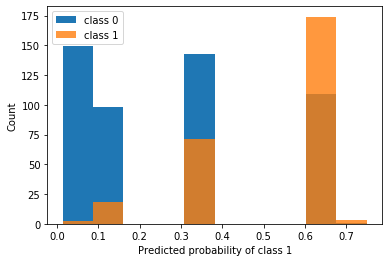

In [3]:
# load some data
data = fetch_openml("diabetes", version=1) # get dataset
y = (data.target == 'tested_positive').astype(np.int) # labels 0-1
X = data.data
print('shapes', X.shape, y.shape)

# fit a greedy rule list
m = GreedyRuleListClassifier()
m.fit(X, y=y, feature_names=data.feature_names) # stores into m.rules_
probs = m.predict_proba(X)
print(m)

# look at prediction breakdown
plt.hist(probs[:, 1][y==0], label='class 0')
plt.hist(probs[:, 1][y==1], label='class 1', alpha=0.8)
plt.ylabel('Count')
plt.xlabel('Predicted probability of class 1')
plt.legend()
plt.show()

### oneR
**like a decision tree that only ever splits going left**

shapes (768, 8) (768,)
acc preg 0.68


/Users/chandan/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/chandan/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


acc plas 0.74
acc pres 0.65
acc skin 0.65
acc insu 0.65
acc mass 0.65
acc pedi 0.65
acc age 0.65
mean 0.349 (768 pts)
if plas >= 128.0 then 0.615 (283 pts)
mean 0.194 (485 pts)
if plas >= 100.0 then 0.271 (288 pts)
mean 0.081 (197 pts)
if plas >= 44.0 then 0.4 (5 pts)
mean 0.073 (192 pts)
if plas >= 78.0 then 0.086 (163 pts)
mean 0 (29 pts)



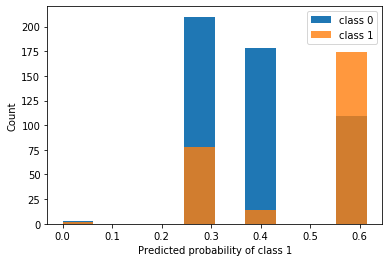

In [15]:
# load some data
data = fetch_openml("diabetes", version=1) # get dataset
y = (data.target == 'tested_positive').astype(np.int) # labels 0-1
X = data.data
print('shapes', X.shape, y.shape)

# fit a oneR model
m = OneRClassifier()
m.fit(X, y=y, feature_names=data.feature_names) # stores into m.rules_
probs = m.predict_proba(X)
print(m)

# look at prediction breakdown
plt.hist(probs[:, 1][y==0], label='class 0')
plt.hist(probs[:, 1][y==1], label='class 1', alpha=0.8)
plt.ylabel('Count')
plt.xlabel('Predicted probability of class 1')
plt.legend()
plt.show()

### scalable bayesian rule lists

In [8]:
np.random.seed(13)

feature_labels = ["#Pregnant","Glucose concentration test","Blood pressure(mmHg)","Triceps skin fold thickness(mm)",
                  "2-Hour serum insulin (mu U/ml)","Body mass index","Diabetes pedigree function","Age (years)"]
data = fetch_openml("diabetes") # get dataset
X = data.data
y = (data.target == 'tested_positive').astype(np.int) # labels 0-1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75) # split

# train classifier (allow more iterations for better accuracy; use BigDataRuleListClassifier for large datasets)
print('training...')
model = BayesianRuleListClassifier(max_iter=1000, class1label="diabetes", verbose=False)
model.fit(X_train, y_train, feature_labels=feature_labels)
preds = model.predict(X_test)
print("RuleListClassifier Accuracy:", np.mean(y_test == preds), "Learned interpretable model:\n", model)
# print("RandomForestClassifier Accuracy:", RandomForestClassifier(n_estimators=10).fit(Xtrain, ytrain).score(Xtest, ytest))

/accounts/projects/vision/.local/lib/python3.7/site-packages/sklearn/datasets/_openml.py:376: UserWarning: Multiple active versions of the dataset matching the name diabetes exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


training...
RuleListClassifier Accuracy: 0.671875 Learned interpretable model:
 Trained RuleListClassifier for detecting diabetes
IF #Pregnant_-inf_to_6.5 AND Glucose concentration test_-inf_to_122.5 THEN probability of diabetes: 9.9% (4.9%-16.4%)
ELSE IF Body mass index_30.9_to_inf THEN probability of diabetes: 69.7% (58.2%-80.1%)
ELSE IF Triceps skin fold thickness(mm)_All THEN probability of diabetes: 38.7% (22.7%-56.1%)
ELSE IF Age (years)_26.5_to_inf THEN probability of diabetes: 50.0% (2.5%-97.5%)
ELSE probability of diabetes: 50.0% (2.5%-97.5%)



# rule trees

### short decision tree

train mse: 15.38


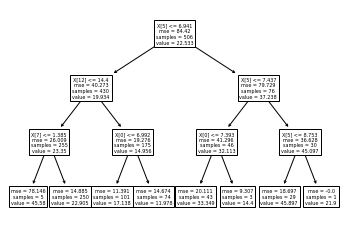

In [3]:
# load in some data
X, y, features = get_reg_boston_data()

# specify a decision tree with a maximum depth
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X, y)

# calculate mse on the training data
preds = dt.predict(X)
print(f'train mse: {np.mean(np.square(preds-y)):0.2f}')

plot_tree(dt)
plt.savefig('tree.pdf')
plt.show()

### optimal classification tree
- docs [here](https://github.com/csinva/interpretability-workshop/tree/master/imodels/optimal_classification_tree)
- note: this implementation is still somewhat unstable, and can be made faster by installing either `cplex` or `gurobi`

In [3]:
sys.path.append('../imodels/optimal_classification_tree/pyoptree')
sys.path.append('../imodels/optimal_classification_tree/')

In [ ]:
from optree import OptimalTreeModel
feature_names = np.array(["x1", "x2"])

X = np.array([[1, 2, 2, 2, 3], [1, 2, 1, 0, 1]]).T
y = np.array([1, 1, 0, 0, 0]).reshape(-1, 1)
X_test = np.array([[1, 1, 2, 2, 2, 3, 3], [1, 2, 2, 1, 0, 1, 0]]).T
y_test = np.array([1, 1, 1, 0, 0, 0, 0])

np.random.seed(13)
model = OptimalTreeModel(tree_depth=3, N_min=1, alpha=0.1) #, solver_name='baron'
model.fit(X_test, y_test) # this method is currently using the fast, but not optimal solver
preds = model.predict(X_test)

# fit on the bigger diabetes dset from above
# model.fit(Xtrain, ytrain) # this method is currently using the fast, but not optimal solver
# preds = model.predict(Xtest)

print('acc', np.mean(preds == y_test))

In [10]:
model.print_tree(feature_names)

depth 0:
	 x2 > 0.8114524236945737

depth 1:
	node 2 undefined
	node 3 undefined

depth 2:
	node 4 undefined
	 x1 > 0.01086684288089712
	 x2 > 0.9159532769401844
	node 7 undefined

depth 3:
	node 8 undefined
	node 9 undefined
	node 10 undefined
	node 11 undefined
	node 12 undefined
	node 13 undefined
	node 14 undefined
	node 15 undefined



# algebraic models

### integer linear models

In [ ]:
np.random.seed(123)

# generate X and y
n, p = 1000, 10
X = np.random.randn(n, p)
y = X[:, 0] + 2 * X[:, 1] - 1 * X[:, 2] + np.random.randn(n)

# fit linear models with different regularization parameters
model = SLIMRegressor()
for lambda_reg in [0, 1e-2, 5e-2, 1e-1, 1, 2]:
    model.fit(X, y, lambda_reg)
    mse = np.mean(np.square(y - model.predict(X)))
    print(f'lambda: {lambda_reg}\tmse: {mse: 0.2f}\tweights: {model.model.coef_}')